# Exemplo de APIs

### 1 - API Simples
#### a) BrasilAPI
#### b) RESTPaíses
### 2 - API com cadastro de chaves

In [1]:
import requests
import pandas as pd
from pprint import pprint
import json
from dotenv import load_dotenv
import os

#### Exemplo de API Simples - BrasilAPI.
É uma API que fornece dados públicos do Brasil. 
> Site: https://brasilapi.com.br/

In [2]:
# Utilizaremos o endpoint do Banco
URL_BANCOS = "https://brasilapi.com.br/api/banks/v1/"

resposta_bancos = requests.get(URL_BANCOS)

print(resposta_bancos.status_code)

200


In [3]:
print(resposta_bancos.headers)

{'Date': 'Tue, 07 Nov 2023 04:47:26 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'Age': '46430', 'Cache-Control': 'max-age=0, public', 'etag': 'W/"9d2b-7NMGZ7SQHqFkNcBNzIQ1NOKajcE"', 'strict-transport-security': 'max-age=63072000', 'x-matched-path': '/api/banks/v1', 'x-vercel-cache': 'HIT', 'x-vercel-id': 'iad1::sfo1::8kjcq-1699332446927-1b8f9bb5ae4d', 'CF-Cache-Status': 'DYNAMIC', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=e%2FlToHObVyy9lOoZywi1gmsvEKBC1oP6ittI2HWx8MPPelRCadJCD3xTUUfToKKGXSsOr0b9dIRw%2FisrivYA3iECbNlj2y7iaZnpFSVcQTegLyvfumJAYzk6TV2536RSyNYBmSdR9s03G7P%2Fhx6r"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server': 'cloudflare', 'CF-RAY': '8222f0312cb0dab1-MIA', 'Content-Encoding': 'br', 'alt-svc': 'h3=":443"; ma=86400'}


In [4]:
# O valor do cabeçalho Content-Type indica que o conteúdo da resposta está no formato JSON. 
bancos = resposta_bancos.json()

# print(bancos)

# Exibindo os 5 primeiros par de chave e valor
print(bancos[:5])

[{'ispb': '00000000', 'name': 'BCO DO BRASIL S.A.', 'code': 1, 'fullName': 'Banco do Brasil S.A.'}, {'ispb': '00000208', 'name': 'BRB - BCO DE BRASILIA S.A.', 'code': 70, 'fullName': 'BRB - BANCO DE BRASILIA S.A.'}, {'ispb': '00038121', 'name': 'Selic', 'code': None, 'fullName': 'Banco Central do Brasil - Selic'}, {'ispb': '00038166', 'name': 'Bacen', 'code': None, 'fullName': 'Banco Central do Brasil'}, {'ispb': '00204963', 'name': 'CCR SEARA', 'code': 430, 'fullName': 'COOPERATIVA DE CREDITO RURAL SEARA - CREDISEARA'}]


In [5]:
# Exibindo os 5 primeiros par de chave e valor utilizando a biblioteca pprint
pprint(bancos[:5])

[{'code': 1,
  'fullName': 'Banco do Brasil S.A.',
  'ispb': '00000000',
  'name': 'BCO DO BRASIL S.A.'},
 {'code': 70,
  'fullName': 'BRB - BANCO DE BRASILIA S.A.',
  'ispb': '00000208',
  'name': 'BRB - BCO DE BRASILIA S.A.'},
 {'code': None,
  'fullName': 'Banco Central do Brasil - Selic',
  'ispb': '00038121',
  'name': 'Selic'},
 {'code': None,
  'fullName': 'Banco Central do Brasil',
  'ispb': '00038166',
  'name': 'Bacen'},
 {'code': 430,
  'fullName': 'COOPERATIVA DE CREDITO RURAL SEARA - CREDISEARA',
  'ispb': '00204963',
  'name': 'CCR SEARA'}]


In [6]:
# salvando os dados em um arquivo JSON
with open("_dataset/bancos.json", "w") as arquivo:
    json.dump(bancos, arquivo)

In [7]:
# lendo os dados de um arquivo JSON
with open("_dataset/bancos.json", "r") as arquivo:
    bancos_arquivo = json.load(arquivo)

In [8]:
# Verificar se o arquivo json salvo é igual ao arquivo original da API
print(bancos == bancos_arquivo)

True


In [9]:
# Passando os dados para um DataFrame
df_bancos = pd.DataFrame(bancos)

df_bancos.head()

,ispb,name,code,fullName
0,00000000,BCO DO BRASIL S.A.,1.0,Banco do Brasil S.A.
1,00000208,BRB - BCO DE BRASILIA S.A.,70.0,BRB - BANCO DE BRASILIA S.A.
2,00038121,Selic,NaN,Banco Central do Brasil - Selic
3,00038166,Bacen,NaN,Banco Central do Brasil
4,00204963,CCR SEARA,430.0,COOPERATIVA DE CREDITO RURAL SEARA - CREDISEARA


In [10]:
df_bancos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ispb      352 non-null    object 
 1   name      352 non-null    object 
 2   code      343 non-null    float64
 3   fullName  352 non-null    object 
dtypes: float64(1), object(3)
memory usage: 11.1+ KB


In [11]:
# df_bancos.tail()

# drop das duas últimas linhas
df_bancos = df_bancos.iloc[:-2]

# selecionando as entradas nulas da coluna code >>>> df_bancos[df_bancos["code"].isnull()]

# fazendo o drop das linhas onde a coluna code é nula
df_bancos = df_bancos.dropna(subset=["code"])

# convertendo os tipos das colunas
df_bancos["code"] = df_bancos["code"].astype(int)

df_bancos.info()

# salvando os dados em um arquivo CSV
df_bancos.to_csv("_dataset/bancos.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ispb      341 non-null    object
 1   name      341 non-null    object
 2   code      341 non-null    int32 
 3   fullName  341 non-null    object
dtypes: int32(1), object(3)
memory usage: 12.0+ KB


In [12]:
# Utilizaremos o endpoint do DDD 
URL_DDD = "https://brasilapi.com.br/api/ddd/v1/"

# verificando o status code de buscas por DDD entre 20 e 30

# para os status code 200, vamos armazenar os dados em um dataframe
df_ddd = pd.DataFrame()

# verificando o status code e adicionando ao dataframe com o método concat
for ddd in range(20, 31):
    resposta = requests.get("".join([URL_DDD, str(ddd)]))
    if resposta.status_code == 200:
        # adicionando os dados ao dataframe, criando uma coluna com o DDD
        df_ddd = pd.concat([df_ddd, pd.DataFrame(resposta.json()).assign(ddd=ddd)])
        
df_ddd = df_ddd.reset_index(drop=True)
df_ddd.head()

,state,cities,ddd
0,RJ,TERESÓPOLIS,21
1,RJ,TANGUÁ,21
2,RJ,SEROPÉDICA,21
3,RJ,SÃO JOÃO DE MERITI,21
4,RJ,SÃO GONÇALO,21


#### Exemplo de API Simples - REST Países
Obtenha informações sobre países por meio de uma API RESTful
> Site: https://restcountries.com/#rest-countries

In [13]:
URL_ALL = "https://restcountries.com/v3.1/all"

resposta = requests.get(URL_ALL)
print(resposta.status_code)
print(resposta.headers)

200
{'Date': 'Tue, 07 Nov 2023 04:49:10 GMT', 'Server': 'Apache/2.4.38 (Debian)', 'Cache-Control': 'public, immutable, max-age=31556926', 'Content-Type': 'application/json', 'content-encoding': 'gzip', 'content-length': '170534', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}


In [14]:
# 'Content-Type': 'application/json'
pprint(resposta.json()[:5])

[{'altSpellings': ['TC'],
  'area': 948.0,
  'capital': ['Cockburn Town'],
  'capitalInfo': {'latlng': [21.46, -71.14]},
  'car': {'side': 'left', 'signs': ['GB']},
  'cca2': 'TC',
  'cca3': 'TCA',
  'ccn3': '796',
  'coatOfArms': {},
  'continents': ['North America'],
  'currencies': {'USD': {'name': 'United States dollar', 'symbol': '$'}},
  'demonyms': {'eng': {'f': 'Turks and Caicos Islander',
                       'm': 'Turks and Caicos Islander'}},
  'fifa': 'TCA',
  'flag': '🇹🇨',
  'flags': {'png': 'https://flagcdn.com/w320/tc.png',
            'svg': 'https://flagcdn.com/tc.svg'},
  'idd': {'root': '+1', 'suffixes': ['649']},
  'independent': False,
  'landlocked': False,
  'languages': {'eng': 'English'},
  'latlng': [21.75, -71.58333333],
  'maps': {'googleMaps': 'https://goo.gl/maps/R8VUDQfwZiFtvmyn8',
           'openStreetMaps': 'https://www.openstreetmap.org/relation/547479'},
  'name': {'common': 'Turks and Caicos Islands',
           'nativeName': {'eng': {'common': 'T

                   'ces': {'common': 'Západní Sahara',
                           'official': 'Západní Sahara'},
                   'cym': {'common': 'Western Sahara',
                           'official': 'Sahrawi Arab Democratic Republic'},
                   'deu': {'common': 'Westsahara',
                           'official': 'Demokratische Arabische Republik '
                                       'Sahara'},
                   'est': {'common': 'Lääne-Sahara',
                           'official': 'Lääne-Sahara'},
                   'fin': {'common': 'Länsi-Sahara',
                           'official': 'Länsi-Sahara'},
                   'fra': {'common': 'Sahara Occidental',
                           'official': 'République arabe sahraouie '
                                       'démocratique'},
                   'hrv': {'common': 'Zapadna Sahara',
                           'official': 'Sahrawi Arab Demokratska Republika'},
                   'hun': {'common': 'Nyugat-S

In [15]:
resposta_all = resposta.json()

resposta_all[0]['name']

{'common': 'Turks and Caicos Islands',
 'official': 'Turks and Caicos Islands',
 'nativeName': {'eng': {'official': 'Turks and Caicos Islands',
   'common': 'Turks and Caicos Islands'}}}

In [16]:
resposta_all[0]['name']['common']

'Turks and Caicos Islands'

In [17]:
# procurando pelo Brasil
for pais in resposta_all:
    if pais['name']['common'] == 'Brazil':
        brasil = pais
        pprint(brasil)

{'altSpellings': ['BR',
                  'Brasil',
                  'Federative Republic of Brazil',
                  'República Federativa do Brasil'],
 'area': 8515767.0,
 'borders': ['ARG',
             'BOL',
             'COL',
             'GUF',
             'GUY',
             'PRY',
             'PER',
             'SUR',
             'URY',
             'VEN'],
 'capital': ['Brasília'],
 'capitalInfo': {'latlng': [-15.79, -47.88]},
 'car': {'side': 'right', 'signs': ['BR']},
 'cca2': 'BR',
 'cca3': 'BRA',
 'ccn3': '076',
 'cioc': 'BRA',
 'coatOfArms': {'png': 'https://mainfacts.com/media/images/coats_of_arms/br.png',
                'svg': 'https://mainfacts.com/media/images/coats_of_arms/br.svg'},
 'continents': ['South America'],
 'currencies': {'BRL': {'name': 'Brazilian real', 'symbol': 'R$'}},
 'demonyms': {'eng': {'f': 'Brazilian', 'm': 'Brazilian'},
              'fra': {'f': 'Brésilienne', 'm': 'Brésilien'}},
 'fifa': 'BRA',
 'flag': '🇧🇷',
 'flags': {'alt': 'The fl

In [18]:
URL_BRASIL = "https://restcountries.com/v3.1/name/brasil"

resposta_brasil = requests.get(URL_BRASIL).json()
pprint(resposta_brasil) # Lista com apenas um elemento que é um dicionario

[{'altSpellings': ['BR',
                   'Brasil',
                   'Federative Republic of Brazil',
                   'República Federativa do Brasil'],
  'area': 8515767.0,
  'borders': ['ARG',
              'BOL',
              'COL',
              'GUF',
              'GUY',
              'PRY',
              'PER',
              'SUR',
              'URY',
              'VEN'],
  'capital': ['Brasília'],
  'capitalInfo': {'latlng': [-15.79, -47.88]},
  'car': {'side': 'right', 'signs': ['BR']},
  'cca2': 'BR',
  'cca3': 'BRA',
  'ccn3': '076',
  'cioc': 'BRA',
  'coatOfArms': {'png': 'https://mainfacts.com/media/images/coats_of_arms/br.png',
                 'svg': 'https://mainfacts.com/media/images/coats_of_arms/br.svg'},
  'continents': ['South America'],
  'currencies': {'BRL': {'name': 'Brazilian real', 'symbol': 'R$'}},
  'demonyms': {'eng': {'f': 'Brazilian', 'm': 'Brazilian'},
               'fra': {'f': 'Brésilienne', 'm': 'Brésilien'}},
  'fifa': 'BRA',
  'flag': '

In [19]:
resposta_brasil[0].keys()

dict_keys(['name', 'tld', 'cca2', 'ccn3', 'cca3', 'cioc', 'independent', 'status', 'unMember', 'currencies', 'idd', 'capital', 'altSpellings', 'region', 'subregion', 'languages', 'translations', 'latlng', 'landlocked', 'borders', 'area', 'demonyms', 'flag', 'maps', 'population', 'gini', 'fifa', 'car', 'timezones', 'continents', 'flags', 'coatOfArms', 'startOfWeek', 'capitalInfo', 'postalCode'])

In [20]:
# pegando todos os países da América do Sul, com seus nomes, população e capitais
URL_AMERICA_SUL_FILTROS = "https://restcountries.com/v3.1/region/south%20america?fields=name,population,capital"
requests.get(URL_AMERICA_SUL_FILTROS).status_code

200

In [21]:
resposta_america_sul = requests.get(URL_AMERICA_SUL_FILTROS).json()
pprint(resposta_america_sul[:5])

[{'capital': ['Quito'],
  'name': {'common': 'Ecuador',
           'nativeName': {'spa': {'common': 'Ecuador',
                                  'official': 'República del Ecuador'}},
           'official': 'Republic of Ecuador'},
  'population': 17643060},
 {'capital': ['Lima'],
  'name': {'common': 'Peru',
           'nativeName': {'aym': {'common': 'Piruw', 'official': 'Piruw Suyu'},
                          'que': {'common': 'Piruw',
                                  'official': 'Piruw Ripuwlika'},
                          'spa': {'common': 'Perú',
                                  'official': 'República del Perú'}},
           'official': 'Republic of Peru'},
  'population': 32971846},
 {'capital': ['Cayenne'],
  'name': {'common': 'French Guiana',
           'nativeName': {'fra': {'common': 'Guyane française',
                                  'official': 'Guyane'}},
           'official': 'Guiana'},
  'population': 254541},
 {'capital': ['Brasília'],
  'name': {'common': 'Braz

In [22]:
# organizando os dados que queremos (nome comum, população e capital)
paises_america_sul = []
for pais in resposta_america_sul:
    novo_pais = {
        'nome': pais['name']['common'],
        'populacao': pais['population'],
        'capital': pais['capital'][0]
    }
    paises_america_sul.append(novo_pais)

pprint(paises_america_sul[:5])

[{'capital': 'Quito', 'nome': 'Ecuador', 'populacao': 17643060},
 {'capital': 'Lima', 'nome': 'Peru', 'populacao': 32971846},
 {'capital': 'Cayenne', 'nome': 'French Guiana', 'populacao': 254541},
 {'capital': 'Brasília', 'nome': 'Brazil', 'populacao': 212559409},
 {'capital': 'Georgetown', 'nome': 'Guyana', 'populacao': 786559}]


In [23]:
df_america_sul = pd.DataFrame(paises_america_sul)
display(df_america_sul)

,nome,populacao,capital
0,Ecuador,17643060,Quito
1,Peru,32971846,Lima
2,French Guiana,254541,Cayenne
3,Brazil,212559409,Brasília
4,Guyana,786559,Georgetown
5,Uruguay,3473727,Montevideo
6,Paraguay,7132530,Asunción
7,Chile,19116209,Santiago
8,Suriname,586634,Paramaribo
9,Argentina,45376763,Buenos Aires


In [24]:
df_america_sul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       14 non-null     object
 1   populacao  14 non-null     int64 
 2   capital    14 non-null     object
dtypes: int64(1), object(2)
memory usage: 464.0+ bytes


#### Exemplo de API com cadastro de chave  - BrasilAPI. 
A API FRED® é um serviço web que permite aos desenvolvedores escrever programas e construir aplicativos que recuperam dados econômicos dos sites FRED® e ALFRED® hospedados pela Divisão de Pesquisa Econômica do Federal Reserve Bank de St.
> Site: https://fred.stlouisfed.org/

>  "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

<br>

#### Criação da chave de acesso da API:
1. Clique em FRED Tools e depois em FRED API
2. Clique em API Keys
3. Clique em Request or view your API keys e crie uma conta
4. Clique em Request API Key
5. Escreva no campo "Describe the application or program you intend to write:" Describe the Study of economic data from Brazil, marque o campo "I have read and agree to the St. Louis Fed's Terms of Use, Privacy Notice & Policy, and Legal Notices, Information and Disclaimers." e marque Request API Key
6. Será gerada a chave de acesso. Copie e cole num bloco de notas e salve como env. Será criado um arquivo .env com a informação da chave de acesso.
7. Instale a biblioteca python-dotenv e os
8. Inclua as bibliotecas python-dotenv e os junto com as outras para serem importadas
9. Escolha o endpoint que deseja solicitar 
10. Defina a quantidade de dados que será solicitado para API, utilizando a variável constante (Realizando paginação)
11. Defina a quantidade de deslocamento dos dados que será solicitado para API, caso queira.
12. Converta os dados em Json para Dataframe

In [25]:
load_dotenv()

key = os.getenv("API_KEY")

In [26]:
print(key)

None


In [27]:
# caminho para o arquivo .env
env_path = '_dataset/.env'  
load_dotenv(dotenv_path=env_path)

# acessando variáveis de ambiente
key = os.getenv('API_KEY')

In [28]:
# Endpoint escolhido: fred/series/search - Obtenha séries de dados econômicos que correspondam a palavras-chave.
# https://fred.stlouisfed.org/docs/api/fred/series_search.html
# JSON > Solicitação (HTTPS GET) > https://api.stlouisfed.org/fred/series/search?search_text=monetary+service+index&api_key=abcdefghijklmnopqrstuvwxyz123456&file_type=json

BUSCA_BR = "brazil"

URL_BRASIL_BUSCA = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json"

In [29]:
resposta_br_busca = requests.get(URL_BRASIL_BUSCA)

print(resposta_br_busca.status_code)
# Requisição foi feita com sucesso
print(resposta_br_busca.headers)
# Verificando se está no formado json: 'Content-Type': 'application/json

200
{'Content-Type': 'application/json; charset=UTF-8', 'Expires': 'Tue, 07 Nov 2023 04:59:18 GMT', 'x-rate-limit-limit': '120', 'x-rate-limit-remaining': '120', 'ETag': '"589dfdc0c1fe2ffc4d4168eae9506f98-gzip"', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Content-Length': '81623', 'Date': 'Tue, 07 Nov 2023 04:49:18 GMT', 'Connection': 'keep-alive'}


In [30]:
pprint(resposta_br_busca.json())
# As informações estão dentro da chave Seriess
# Foi fornecedido 1000 elementos

{'count': 1198,
 'limit': 1000,
 'offset': 0,
 'order_by': 'search_rank',
 'realtime_end': '2023-11-06',
 'realtime_start': '2023-11-06',
 'seriess': [{'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 48,
              'id': 'NGDPRSAXDCBRQ',
              'last_updated': '2023-09-18 07:53:04-05',
              'observation_end': '2023-04-01',
              'observation_start': '1996-01-01',
              'popularity': 47,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Real Gross Domestic Product for Brazil',
              'units': 'Domestic Currency',
              'units_short': 'Domestic Currency'},
             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 47,
              'id': 'CPALTT01BRM659N',
             

              'popularity': 21,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Unemployment Rate: Aged 15 and over: All Persons for '
                       'Brazil',
              'units': 'Percent',
              'units_short': '%'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 24,
              'id': 'LRUNTTTTBRQ156S',
              'last_updated': '2022-09-14 14:43:06-05',
              'notes': 'OECD Descriptor ID: LRUNTTTT\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (dat

                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2023-04-01',
              'observation_start': '1996-04-01',
              'popularity': 2,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'National Accounts: GDP by Expenditure: Constant '
                       'Prices: Gross Domestic Product: Total for Brazil',
              'units': 'Growth ra

              'group_popularity': 10,
              'id': 'PRINTO01BRA659S',
              'last_updated': '2023-08-10 16:16:15-05',
              'notes': 'OECD Descriptor ID: PRINTO01\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2022-01-01',
              'observation_start': '1976-01-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short':

              'seasonal_adjustment_short': 'NSA',
              'title': 'International Trade: Exports: Value (Goods): Total for '
                       'Brazil',
              'units': 'US Dollar, Annual level',
              'units_short': 'US $, Annual level'},
             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 8,
              'id': 'XTEXVA01BRM659S',
              'last_updated': '2023-10-12 11:51:07-05',
              'notes': 'OECD Descriptor ID: XTEXVA01\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprin

             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 6,
              'id': 'NAEXCP02BRA189N',
              'last_updated': '2023-04-20 16:04:24-05',
              'notes': 'OECD Descriptor ID: NAEXCP02\n'
                       'OECD unit ID: BRL\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2022-01-01',
              'observation_start': '1996-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adj

                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2022-01-01',
              'observation_start': '1996-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Monetary Aggregates and Their Components: Narrow Money '
                       'and Components: M1 and Components: M1 for Brazil',
              'units': 'Growth rate previous period',
              'units_short': 'Growth rate previous period'},
             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 5,
              'id': 'MANMM101BRM657S',
              'last_updated': '2023-09-12 20:29:46-05',
              'notes': 'OECD Descr

              'notes': 'Assets of five largest banks as a share of total '
                       'commercial banking assets. Total assets include total '
                       'earning assets, cash and due from banks, foreclosed '
                       'real estate, fixed assets, goodwill, other '
                       'intangibles, current tax assets, deferred tax, '
                       'discontinued operations and other assets.\n'
                       '\n'
                       'Raw data are from Bankscope. (Sum(data2025) for five '
                       'largest banks in Bankscope) / (Sum(data2025) for all '
                       'banks in Bankscope). Only reported if number of banks '
                       'in Bankscope is 5 or more. (Calculated from underlying '
                       'bank-by-bank unconsolidated data from Bankscope)\n'
                       '\n'
                       'Source Code: GFDD.OI.06',
              'observation_end': '2020-01-01',
        

              'notes': 'Credit is provided by domestic banks, all other '
                       'sectors of the economy and non-residents. The "private '
                       'non-financial sector" includes non-financial '
                       'corporations (both private-owned and public-owned), '
                       'households and non-profit institutions serving '
                       'households as defined in the System of National '
                       'Accounts 2008. The series have quarterly frequency and '
                       'capture the outstanding amount of credit at the end of '
                       'the reference quarter. In terms of financial '
                       'instruments, credit covers loans and debt '
                       'securities.(1)\n'
                       '\n'
                       'The combination of different sources and data from '
                       'various methodological frameworks resulted in breaks '
                      

              'title': 'Production: Manufacturing: Total Manufacturing for '
                       'Brazil',
              'units': 'Index 2015=100',
              'units_short': 'Index 2015=100'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 4,
              'id': 'PRMNTO01BRQ657S',
              'last_updated': '2023-10-12 11:31:19-05',
              'notes': 'OECD Descriptor ID: PRMNTO01\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2023-04-0

              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Gross Portfolio Equity Liabilities to GDP for Brazil',
              'units': 'Percent',
              'units_short': '%'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 3,
              'id': 'WYBRAA475SCEN',
              'last_updated': '2021-01-29 14:38:12-06',
              'notes': 'This data series illustrates the movement of exports '
                       'from the given state to the given country. A missing '
                       'observation can mean two things. First, missing '
                       'observations can appear because no exports were made '
                       'to the listed country that year. Secondly, it could '
                       'signify a low number of export

              'title': 'Monetary Aggregates and Their Components: Broad Money '
                       'and Components: M3 for Brazil',
              'units': 'Brazilian Real',
              'units_short': 'Brazilian Real'},
             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 3,
              'id': 'BRAMABMM301GYSAM',
              'last_updated': '2023-08-09 10:23:55-05',
              'notes': 'OECD Descriptor ID: MABMM301\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'obs

                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2018-01-01',
              'observation_start': '1991-01-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Production: Manufacturing: Intermediate Goods: Total '
                       'for Brazil',
              'units': 'Index 2015=100',
              'units_short': 'Index 2015=100'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 3,
              'id': 'PRMNIG01BRQ661N',
              'last_updated': '2023-04-20 16:13:30-05',
              'notes': 'OECD Descriptor ID: PRMNIG01\n'
                       'OECD unit ID: IDX\n'
                       'OECD country ID: BRA\n'
                       '\n'
 

                       'www.ggdc.net/pwt\n'
                       '\n'
                       'For more information, see '
                       'http://www.rug.nl/research/ggdc/data/pwt/.',
              'observation_end': '2019-01-01',
              'observation_start': '1950-01-01',
              'popularity': 2,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Capital Stock at Constant National Prices for Brazil',
              'units': 'Millions of 2017 U.S. Dollars',
              'units_short': 'Mil. of 2017 U.S. $'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 2,
              'id': 'DDOI02BRA156NWDB',
              'last_updated': '2022-03-23 16:23:14-05',
              'notes': 'The total value of demand, time and saving deposits at '

                       'total value traded, M is stock market capitalization, '
                       'P_e is end-of period CPI. End-of period CPI (IFS line '
                       '64M..ZF or, if not available, 64Q..ZF) and annual CPI '
                       "(IFS line 64..ZF) are from the IMF's International "
                       "Financial Statistics. Standard & Poor's, Global Stock "
                       'Markets Factbook and supplemental S&P data)\n'
                       '\n'
                       'Source Code: GFDD.EM.01',
              'observation_end': '2020-01-01',
              'observation_start': '2000-01-01',
              'popularity': 2,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Stock Market Turnover Ratio (Value '
                       'Traded/Capitalization) for Brazil',
  

              'title': 'Consumer Price Index: Total Food Including Restaurants '
                       'for Brazil',
              'units': 'Index 2010=100',
              'units_short': 'Index 2010=100'},
             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 2,
              'id': 'CPGDFD01BRM661N',
              'last_updated': '2018-06-11 14:11:51-05',
              'notes': 'OECD descriptor ID: CPGDFD01\n'
                       'OECD unit ID: IXOB\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators '
                       '(database),http://dx.doi.org/10.1787/data-00052-en '
                       '(Accessed on date)\n'
                       'Copyright, 2016, OECD. Reprinted with permission.',
         

              'title': 'Unemployed Population: Aged 15 and over: All Persons '
                       'for Brazil',
              'units': 'Persons',
              'units_short': 'Persons'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 2,
              'id': 'LCEATT03BRA189N',
              'last_updated': '2023-04-20 16:04:44-05',
              'notes': 'OECD Descriptor ID: LCEATT03\n'
                       'OECD unit ID: BRL\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2022-01-01',
      

              'units_short': 'Persons'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'LFWA24TTBRQ647N',
              'last_updated': '2022-09-14 15:09:58-05',
              'notes': 'OECD Descriptor ID: LFWA24TT\n'
                       'OECD unit ID: PER\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2015-07-01',
              'observation_start': '2002-04-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start

                       "of the IMF's International Financial Statistics. "
                       'Central Bank claims (IFS lines 12, a-d); GDP in local '
                       'currency (IFS line 99B..ZF or, if not available, line '
                       '99B.CZF); end-of period CPI (IFS line 64M..ZF or, if '
                       'not available, 64Q..ZF); and annual CPI (IFS line '
                       '64..ZF). (International Monetary Fund, International '
                       'Financial Statistics, and World Bank GDP estimates)\n'
                       '\n'
                       'Source Code: GFDD.DI.06',
              'observation_end': '2020-01-01',
              'observation_start': '1960-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Central Bank Assets

              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Number of Bank Branches for Brazil',
              'units': 'Number per 100,000 adults',
              'units_short': 'Number per 100,000 adults'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'LORSGPORBRQ659S',
              'last_updated': '2023-09-12 15:57:39-05',
              'notes': 'OECD Descriptor ID: LORSGPOR\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyrig

              'units': 'National Currency',
              'units_short': 'National Currency'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'NMSAXDCBRQ',
              'last_updated': '2023-09-25 07:53:18-05',
              'observation_end': '2023-04-01',
              'observation_start': '1996-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Nominal Imports of Goods and Services for Brazil',
              'units': 'Domestic Currency',
              'units_short': 'Domestic Currency'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'PGDPUSBRA621NUPN',
              'last_updated': '2012-09-17 10:43:34-0

              'notes': 'OECD Descriptor ID: BREMFT02\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2023-09-01',
              'observation_start': '2010-03-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Business Tendency Surveys (Retail Trade): Employment: '
                       'Future Tendency: Natio

              'units_short': 'Number'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'NCGGRSAXDCBRQ',
              'last_updated': '2023-09-18 07:54:03-05',
              'observation_end': '2023-04-01',
              'observation_start': '1996-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Real General Government Final Consumption Expenditure '
                       'for Brazil',
              'units': 'Domestic Currency',
              'units_short': 'Domestic Currency'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'NCGGRNSAXDCBRQ',
              'last_updated': '2023-09-18 07:54:01-05',
     

                       'basis is useful to analyse potential support that '
                       'might be available from the parent company and to '
                       'understand links between borrowers in different '
                       'countries and sectors.\n'
                       'For example, the debts of a Cayman Islands subsidiary '
                       'of a Brazilian bank may be guaranteed by the parent '
                       'bank. Consistent with the approach taken in the '
                       'international banking statistics, the BIS bases the '
                       'nationality of an issuer on the residency of its '
                       'controlling parent, regardless of any intermediate '
                       'owners. (December 2012, BIS Quarterly Review, '
                       'https://www.bis.org/publ/qtrpdf/r_qt1212h.pdf)\n'
                       '\n'
                       'Copyright, 2016, Bank for International Settlements '
          

             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 1,
              'id': 'LREM24TTBRM156S',
              'last_updated': '2022-09-14 15:38:42-05',
              'notes': 'OECD Descriptor ID: LREM24TT\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2015-11-01',
              'observation_start': '2002-03-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adj

              'id': 'WUIMABRA',
              'last_updated': '2023-10-15 15:00:09-05',
              'notes': 'The World Uncertainty Index determines uncertainty '
                       'using the frequency of the selfsame word in the '
                       'quarterly Economist Intelligence Unit country reports. '
                       'This smoothed version of the index is preferred over '
                       'the index for country-level data. The 3-quarter '
                       'weighted moving average is computed as follows: 1996Q4 '
                       '= (1996Q4*0.6) + (1996Q3*0.3) + (1996Q2*0.1)/3.\n'
                       '\n'
                       'Please see Hites Ahir, Nicholas Bloom and Davide '
                       "Furceri (2018), 'The World Uncertainty Index' "
                       '(https://www.policyuncertainty.com/media/WUI_mimeo_10_29.pdf) '
                       'for additional explanation.',
              'observation_end': '2023-07-01',
       

                       'similar documents (such as American depository '
                       'receipts) that usually denote ownership of equity. Raw '
                       "data are from the electronic version of the IMF's "
                       'International Financial Statistics. IFS line 79ADDZF / '
                       'GDP. Local currency GDP is from IFS (line 99B..ZF or, '
                       'if not available, line 99B.CZF). Missing observations '
                       'are imputed by using GDP growth rates from World '
                       'Development Indicators, instead of substituting the '
                       'levels. This approach ensures a smoother GDP series. '
                       '(International Monetary Fund, International Financial '
                       'Statistics)\n'
                       '\n'
                       'Source Code: GFDD.DM.09',
              'observation_end': '2019-01-01',
              'observation_start': '2001-01-01',
    

              'id': 'QBRHAM770A',
              'last_updated': '2023-09-18 13:03:08-05',
              'notes': 'Credit is provided by domestic banks, all other '
                       'sectors of the economy and non-residents. The "private '
                       'non-financial sector" includes non-financial '
                       'corporations (both private-owned and public-owned), '
                       'households and non-profit institutions serving '
                       'households as defined in the System of National '
                       'Accounts 2008. The series have quarterly frequency and '
                       'capture the outstanding amount of credit at the end of '
                       'the reference quarter. In terms of financial '
                       'instruments, credit covers loans and debt '
                       'securities.(1)\n'
                       '\n'
                       'The combination of different sources and data from '
           

                       '\n'
                       'Amount of public international debt securities '
                       '(amounts outstanding), as a share of GDP. It covers '
                       'long-term bonds and notes and money market instruments '
                       'placed on international markets. Table 12D '
                       '(international debt amount): governments / GDP. End of '
                       'year data (i.e. December data) are considered for debt '
                       'securities. GDP is from World Development Indicators. '
                       '(Bank for International Settlements)\n'
                       '\n'
                       'Source Code: GFDD.DM.06',
              'observation_end': '2019-01-01',
              'observation_start': '1980-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
      

              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': "Bank's Cost to Income Ratio for Brazil",
              'units': 'Percent',
              'units_short': '%'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'IDS1YMAORINCBR',
              'last_updated': '2023-09-18 11:04:40-05',
              'notes': 'This series appears in Table 14c.\n'
                       'Source Code: Q:BR:3P:J:1:C:A:A:TO1:A:U:A:A:A:I\n'
                       '\n'
                       'Nationality refers to the ultimate obligor, as opposed '
                       'to the immediate borrower on a residence basis, and is '
                       'linked to the consolidation of assets and liabilities '
                       'for related entities. Information on a nationality '
                       'basis is useful to analyse potential 

                       'sectors of the economy and non-residents. The "private '
                       'non-financial sector" includes non-financial '
                       'corporations (both private-owned and public-owned), '
                       'households and non-profit institutions serving '
                       'households as defined in the System of National '
                       'Accounts 2008. The series have quarterly frequency and '
                       'capture the outstanding amount of credit at the end of '
                       'the reference quarter. In terms of financial '
                       'instruments, credit covers loans and debt '
                       'securities.(1)\n'
                       '\n'
                       'The combination of different sources and data from '
                       'various methodological frameworks resulted in breaks '
                       'in the series. The BIS is therefore, in addition, '
                    

              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Value of Exports to Brazil from South Dakota',
              'units': 'Dollars',
              'units_short': '$'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'BRAFCBODCLNUM',
              'last_updated': '2016-11-10 15:25:00-06',
              'notes': 'Copyright © 2016, International Monetary Fund. '
                       'Reprinted with permission. Complete terms of use and '
                       'contact details are available at '
                       'http://www.imf.org/external/terms.htm.',
              'observation_end': '2015-01-01',
              'observation_start': '2005-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Season

              'observation_end': '2023-01-01',
              'observation_start': '1993-10-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Credit to Private Non-Financial Sector by Domestic '
                       'Banks, Unadjusted for Breaks, for Brazil',
              'units': 'Billions of Brazilian Reals',
              'units_short': 'Bil. of Brazilian Reals'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'MOBRAA475SCEN',
              'last_updated': '2021-01-29 14:52:38-06',
              'notes': 'This data series illustrates the movement of exports '
                       'from the given state to the given country. A missing '
                       'observation can mean two th

              'id': 'TXBRAA052SCEN',
              'last_updated': '2018-06-26 09:41:19-05',
              'notes': 'This data series illustrates the movement of exports '
                       'from the given state to the given country. A missing '
                       'observation can mean two things. First, missing '
                       'observations can appear because no exports were made '
                       'to the listed country that year. Secondly, it could '
                       'signify a low number of exporters thus giving away '
                       'proprietary data away.',
              'observation_end': '2014-01-01',
              'observation_start': '1992-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Value of Exports to Brazil from Texas

                       'Quarterly Review at '
                       'https://www.bis.org/publ/qtrpdf/r_qt1303h.htm. (1)\n'
                       '\n'
                       'Source Code: Q:BR:A:P:U\n'
                       '\n'
                       '(1) Bank for International Settlements. "Long series '
                       'on credit to private non-financial '
                       'sectors".https://www.bis.org/statistics/credtopriv.htm\n'
                       '\n'
                       'Copyright, 2016, Bank for International Settlements '
                       '(BIS). Terms and conditions of use are available at '
                       'http://www.bis.org/terms_conditions.htm#Copyright_and_Permissions.',
              'observation_end': '2023-01-01',
              'observation_start': '1993-10-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally 

              'last_updated': '2018-06-26 15:24:32-05',
              'notes': 'Copyright © 2016, International Monetary Fund. '
                       'Reprinted with permission. Complete terms of use and '
                       'contact details are available at '
                       'http://www.imf.org/external/terms.htm.',
              'observation_end': '2017-01-01',
              'observation_start': '2004-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Use of Financial Services, Assets: Outstanding Loans '
                       'at Other Other Financial Intermediaries for Brazil',
              'units': 'National Currency',
              'units_short': 'National Currency'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
           

              'units_short': 'National Currency'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'MSBRAA052SCEN',
              'last_updated': '2021-01-29 14:43:06-06',
              'notes': 'This data series illustrates the movement of exports '
                       'from the given state to the given country. A missing '
                       'observation can mean two things. First, missing '
                       'observations can appear because no exports were made '
                       'to the listed country that year. Secondly, it could '
                       'signify a low number of exporters thus giving away '
                       'proprietary data away.',
              'observation_end': '2017-01-01',
              'observation_start': '1997-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
            

              'notes': 'This data series illustrates the movement of exports '
                       'from the given state to the given country. A missing '
                       'observation can mean two things. First, missing '
                       'observations can appear because no exports were made '
                       'to the listed country that year. Secondly, it could '
                       'signify a low number of exporters thus giving away '
                       'proprietary data away.',
              'observation_end': '2016-01-01',
              'observation_start': '1992-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Number of Identified Exporters to Brazil from U.S. '
                       'Virgin Islands',
              'units': 'Number of Fi

              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'BRAFCRODUPENUM',
              'last_updated': '2023-07-19 15:47:47-05',
              'notes': 'Copyright © 2016, International Monetary Fund. '
                       'Reprinted with permission. Complete terms of use and '
                       'contact details are available at '
                       'http://www.imf.org/external/terms.htm.',
              'observation_end': '2022-01-01',
              'observation_start': '2007-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Use of Financial Services Borrowers: Persons Borrowing '
                       'from Credit Unions and Financial Cooperatives for '
                       'Brazil',
              'units': 'Number',
 

                       '(BIS). Terms and conditions of use are available at '
                       'http://www.bis.org/terms_conditions.htm#Copyright_and_Permissions.',
              'observation_end': '2015-04-01',
              'observation_start': '1987-01-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Amount Outstanding of International Money Market '
                       'instruments for All Issuers, Residence of Issuer in '
                       'Brazil (DISCONTINUED)',
              'units': 'Billions of US Dollars',
              'units_short': 'Bil. of US $'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'IDSGFCAMNINIBR',
              'last_updated': '2015-09-14 13:45:4

                       'controlling parent, regardless of any intermediate '
                       'owners. (December 2012, BIS Quarterly Review, '
                       'https://www.bis.org/publ/qtrpdf/r_qt1212h.pdf)\n'
                       '\n'
                       'Copyright, 2016, Bank for International Settlements '
                       '(BIS). Terms and conditions of use are available at '
                       'http://www.bis.org/terms_conditions.htm#Copyright_and_Permissions.',
              'observation_end': '2015-04-01',
              'observation_start': '1993-07-01',
              'popularity': 1,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Amount Outstanding Due within One Year of '
                       'International Debt Securities for Financial '
                       'Corpora

              'title': 'International Trade: Net Trade: Value (Goods): Total '
                       'for Brazil',
              'units': 'US Dollar, Quarterly level',
              'units_short': 'US $, Quarterly level'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'LRINTTTTBRA156N',
              'last_updated': '2022-09-14 16:09:19-05',
              'notes': 'OECD Descriptor ID: LRINTTTT\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observ

              'notes': 'OECD Descriptor ID: NAEXKP07\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2022-01-01',
              'observation_start': '1997-01-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'National Accounts: GDP by Expenditure: Constant '
                       'Prices: Less: Imports of Goo

              'units_short': 'Domestic Currency'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'NNXGSRXDCBRA',
              'last_updated': '2023-04-26 11:21:31-05',
              'observation_end': '2022-01-01',
              'observation_start': '1996-01-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Real External Balance of Goods and Services for Brazil',
              'units': 'Domestic Currency',
              'units_short': 'Domestic Currency'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'NCRXDCBRA',
              'last_updated': '2023-04-26 11:21:47-05',
              'observation_end': '202

              'group_popularity': 1,
              'id': 'NNXGSXDCBRA',
              'last_updated': '2023-04-26 11:22:10-05',
              'observation_end': '2022-01-01',
              'observation_start': '1996-01-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Nominal External Balance of Goods and Services for '
                       'Brazil',
              'units': 'Domestic Currency',
              'units_short': 'Domestic Currency'},
             {'frequency': 'Annual',
              'frequency_short': 'A',
              'group_popularity': 1,
              'id': 'BPBLTD01BRA637S',
              'last_updated': '2017-04-15 13:08:21-05',
              'notes': 'OECD descriptor ID: BPBLTD01\n'
                       'OECD unit ID: CXCUSA\n'
                       'O

                       'instruments, credit covers loans and debt '
                       'securities.(1)\n'
                       '\n'
                       'The combination of different sources and data from '
                       'various methodological frameworks resulted in breaks '
                       'in the series. The BIS is therefore, in addition, '
                       'publishing a second set of series adjusted for breaks, '
                       'which covers the same time span as the unadjusted '
                       'series. The break-adjusted series are the result of '
                       "the BIS's own calculations, and were obtained by "
                       'adjusting levels through standard statistical '
                       'techniques described in the special feature on the '
                       'long credit series of the March 2013 issue of the BIS '
                       'Quarterly Review at '
                       'https://www.bis.org/p

                       '(database),http://dx.doi.org/10.1787/data-00052-en '
                       '(Accessed on date)\n'
                       'Copyright, 2016, OECD. Reprinted with permission.',
              'observation_end': '2022-01-01',
              'observation_start': '1975-01-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Production: Mining: Total Mining: Total for Brazil',
              'units': 'Index 2015=100',
              'units_short': 'Index 2015=100'},
             {'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 1,
              'id': 'NFINSAXDCBRQ',
              'last_updated': '2023-09-25 07:53:38-05',
              'observation_end': '2023-04-01',
              'observation_start': '1996-01-01',
      

                       'http://www.bis.org/terms_conditions.htm#Copyright_and_Permissions.\n'
                       '\n'
                       'Unless otherwise specified, series values are market '
                       'values. For information specifying what comprises G20, '
                       'Advanced Economies, Emerging Market Economies, and All '
                       'Reporting Economies, visit '
                       'https://www.bis.org/statistics/totcredit/tables_f.pdf',
              'observation_end': '2023-01-01',
              'observation_start': '1994-07-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Total Credit to Non-Financial Corporations, Adjusted '
                       'for Breaks, for Brazil',
              'units': 'Billions of US Dollar

             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 1,
              'id': 'LFUN24TTBRM647N',
              'last_updated': '2018-02-26 13:55:56-06',
              'notes': 'OECD Descriptor ID: LFUN24TT\n'
                       'OECD unit ID: PER\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2015-11-01',
              'observation_start': '2002-03-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_ad

                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2015-07-01',
              'observation_start': '2002-07-01',
              'popularity': 0,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Not Seasonally Adjusted',
              'seasonal_adjustment_short': 'NSA',
              'title': 'Employed Population: Aged 15-24: All Persons for '
                       'Brazil',
              'units': 'Growth rate previous period',
              'units_short': 'Growth rate previous period'},
             {'frequency': 'Quarterly',
      

In [31]:
# Mostrando as informações do primeiro elemento da chave Seriess 
pprint(resposta_br_busca.json()["seriess"][0])

{'frequency': 'Quarterly',
 'frequency_short': 'Q',
 'group_popularity': 48,
 'id': 'NGDPRSAXDCBRQ',
 'last_updated': '2023-09-18 07:53:04-05',
 'observation_end': '2023-04-01',
 'observation_start': '1996-01-01',
 'popularity': 47,
 'realtime_end': '2023-11-06',
 'realtime_start': '2023-11-06',
 'seasonal_adjustment': 'Seasonally Adjusted',
 'seasonal_adjustment_short': 'SA',
 'title': 'Real Gross Domestic Product for Brazil',
 'units': 'Domestic Currency',
 'units_short': 'Domestic Currency'}


In [32]:
# limitando a 5 resultados
LIMIT = 5

URL_BRASIL_BUSCA_5 = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json&limit={LIMIT}"

pprint(requests.get(URL_BRASIL_BUSCA_5).json())

{'count': 1198,
 'limit': 5,
 'offset': 0,
 'order_by': 'search_rank',
 'realtime_end': '2023-11-06',
 'realtime_start': '2023-11-06',
 'seriess': [{'frequency': 'Quarterly',
              'frequency_short': 'Q',
              'group_popularity': 48,
              'id': 'NGDPRSAXDCBRQ',
              'last_updated': '2023-09-18 07:53:04-05',
              'observation_end': '2023-04-01',
              'observation_start': '1996-01-01',
              'popularity': 47,
              'realtime_end': '2023-11-06',
              'realtime_start': '2023-11-06',
              'seasonal_adjustment': 'Seasonally Adjusted',
              'seasonal_adjustment_short': 'SA',
              'title': 'Real Gross Domestic Product for Brazil',
              'units': 'Domestic Currency',
              'units_short': 'Domestic Currency'},
             {'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 47,
              'id': 'CPALTT01BRM659N',
              'l

In [33]:
# limitando a 5 resultados, mas com offset
LIMIT = 5
OFFSET = 5

URL_BRASIL_BUSCA_5_OFFSET = f"https://api.stlouisfed.org/fred/series/search?search_text={BUSCA_BR}&api_key={key}&file_type=json&limit={LIMIT}&offset={OFFSET}"

pprint(requests.get(URL_BRASIL_BUSCA_5_OFFSET).json())

{'count': 1198,
 'limit': 5,
 'offset': 5,
 'order_by': 'search_rank',
 'realtime_end': '2023-11-06',
 'realtime_start': '2023-11-06',
 'seriess': [{'frequency': 'Monthly',
              'frequency_short': 'M',
              'group_popularity': 47,
              'id': 'CPALTT01BRM657N',
              'last_updated': '2023-10-12 11:47:04-05',
              'notes': 'OECD Descriptor ID: CPALTT01\n'
                       'OECD unit ID: PC\n'
                       'OECD country ID: BRA\n'
                       '\n'
                       'All OECD data should be cited as follows: OECD, "Main '
                       'Economic Indicators - complete database", Main '
                       'Economic Indicators (database), '
                       'https://dx.doi.org/10.1787/data-00052-en (Accessed on '
                       'date) Copyright, 2016, OECD. Reprinted with permission',
              'observation_end': '2023-08-01',
              'observation_start': '1980-01-01',
            

In [34]:
df_busca = pd.DataFrame(resposta_br_busca.json()["seriess"])
df_busca.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,NGDPRSAXDCBRQ,2023-11-06,2023-11-06,Real Gross Domestic Product for Brazil,1996-01-01,2023-04-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2023-09-18 07:53:04-05,47,48,NaN
1,CPALTT01BRM659N,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for Brazil,1980-12-01,2023-08-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-10-12 11:47:03-05,38,47,OECD Descriptor ID: CPALTT01\nOECD unit ID: PC...
2,NGDPRXDCBRA,2023-11-06,2023-11-06,Real Gross Domestic Product for Brazil,1996-01-01,2022-01-01,Annual,A,Domestic Currency,Domestic Currency,Not Seasonally Adjusted,NSA,2023-04-26 11:20:12-05,10,48,NaN
3,NGDPRNSAXDCBRQ,2023-11-06,2023-11-06,Real Gross Domestic Product for Brazil,1996-01-01,2023-04-01,Quarterly,Q,Domestic Currency,Domestic Currency,Not Seasonally Adjusted,NSA,2023-09-18 07:53:11-05,7,48,NaN
4,BRACPIALLMINMEI,2023-11-06,2023-11-06,Consumer Price Index: All Items: Total for Brazil,1979-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-10-12 11:47:03-05,21,47,OECD Descriptor ID: CPALTT01\nOECD unit ID: ID...


In [35]:
df_busca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         1000 non-null   object
 1   realtime_start             1000 non-null   object
 2   realtime_end               1000 non-null   object
 3   title                      1000 non-null   object
 4   observation_start          1000 non-null   object
 5   observation_end            1000 non-null   object
 6   frequency                  1000 non-null   object
 7   frequency_short            1000 non-null   object
 8   units                      1000 non-null   object
 9   units_short                1000 non-null   object
 10  seasonal_adjustment        1000 non-null   object
 11  seasonal_adjustment_short  1000 non-null   object
 12  last_updated               1000 non-null   object
 13  popularity                 1000 non-null   int64 
 14  group_pop

In [36]:
# procurando por "dollar" no nome da série > df_busca[df_busca["title"].str.contains("dollar", case=False)]
# procurando por frequencia diaria
df_busca["frequency"].value_counts()

Annual                       493
Quarterly                    303
Monthly                      176
Quarterly, End of Quarter     18
5 Year                         4
Daily, 7-Day                   3
Daily                          1
Daily, Close                   1
Annual, End of Year            1
Name: frequency, dtype: int64

In [37]:
df_busca[df_busca["frequency"]=='Daily, 7-Day']

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
179,BRARECD,2023-11-06,2023-11-06,OECD based Recession Indicators for Brazil fro...,1996-02-01,2022-07-31,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2022-11-10 14:24:41-06,3,4,This time series is an interpretation of Organ...
207,BRARECDM,2023-11-06,2023-11-06,OECD based Recession Indicators for Brazil fro...,1996-02-01,2022-07-31,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2022-11-10 14:25:03-06,1,4,This time series is an interpretation of Organ...
458,BRARECDP,2023-11-06,2023-11-06,OECD based Recession Indicators for Brazil fro...,1996-02-01,2022-07-31,"Daily, 7-Day",D,+1 or 0,+1 or 0,Not Seasonally Adjusted,NSA,2022-11-10 14:25:04-06,1,1,This time series is an interpretation of Organ...


In [38]:
df_busca[df_busca["frequency"]=='Daily, Close']

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
58,VXEWZCLS,2023-11-06,2023-11-06,CBOE Brazil ETF Volatility Index,2011-03-16,2023-11-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-06 08:36:07-06,11,11,Exchange Traded Funds (ETFs) are shares of tru...


In [39]:
df_busca[df_busca["frequency"]=='Daily']

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
15,DEXBZUS,2023-11-06,2023-11-06,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-02,2023-11-03,Daily,D,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2023-11-06 15:20:06-06,47,52,Noon buying rates in New York City for cable t...


In [40]:
# frequency: Daily
# ID = DEXBZUS
# Alterando o endpoint para fred/series/observations - Obtenha as observações ou valores de dados para uma série de dados econômicos.
# https://fred.stlouisfed.org/docs/api/fred/series_observations.html#example_json
# # JSON > Solicitação (HTTPS GET) > https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456&file_type=json

SERIE_DOLLAR = "DEXBZUS"

URL_SERIE_DOLLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"

In [41]:
resposta_dollar = requests.get(URL_SERIE_DOLLAR)

resposta_dollar.status_code

200

In [42]:
pprint(resposta_dollar.json())

{'count': 7525,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1995-01-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.8440'},
                  {'date': '1995-01-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.8450'},
                  {'date': '1995-01-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.8450'},
                  {'date': '1995-01-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.8430'},
                  {'date': '1995-01-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
             

                  {'date': '1995-05-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9070'},
                  {'date': '1995-05-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9080'},
                  {'date': '1995-06-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9080'},
                  {'date': '1995-06-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9040'},
                  {'date': '1995-06-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9030'},
                  {'date': '1995-06-06',
                   'realtime_end': '2023-11-06',
          

                   'value': '0.9412'},
                  {'date': '1995-08-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9414'},
                  {'date': '1995-08-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9411'},
                  {'date': '1995-08-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9429'},
                  {'date': '1995-08-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9413'},
                  {'date': '1995-08-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9418'},
                  {'date': '1995-08-23',
                   '

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9661'},
                  {'date': '1995-12-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9661'},
                  {'date': '1995-12-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9665'},
                  {'date': '1995-12-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9662'},
                  {'date': '1995-12-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9665'},
                  {'date': '1995-12-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9872'},
                  {'date': '1996-04-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9870'},
                  {'date': '1996-04-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9871'},
                  {'date': '1996-04-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9891'},
                  {'date': '1996-04-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '0.9893'},
                  {'date': '1996-04-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0050'},
                  {'date': '1996-07-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0060'},
                  {'date': '1996-07-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0054'},
                  {'date': '1996-07-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0060'},
                  {'date': '1996-07-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0055'},
                  {'date': '1996-07-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0258'},
                  {'date': '1996-10-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0267'},
                  {'date': '1996-10-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0269'},
                  {'date': '1996-10-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0261'},
                  {'date': '1996-10-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0273'},
                  {'date': '1996-10-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                  {'date': '1997-02-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0507'},
                  {'date': '1997-02-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0513'},
                  {'date': '1997-02-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0511'},
                  {'date': '1997-02-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0512'},
                  {'date': '1997-03-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0511'},
                  {'date': '1997-03-04',
                   'realtime_end': '2023-11-06',
          

                  {'date': '1997-09-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0925'},
                  {'date': '1997-09-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0940'},
                  {'date': '1997-09-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0940'},
                  {'date': '1997-09-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0945'},
                  {'date': '1997-09-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.0940'},
                  {'date': '1997-09-22',
                   'realtime_end': '2023-11-06',
          

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1210'},
                  {'date': '1998-01-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1210'},
                  {'date': '1998-01-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1210'},
                  {'date': '1998-01-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1215'},
                  {'date': '1998-01-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1215'},
                  {'date': '1998-01-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                  {'date': '1998-05-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1447'},
                  {'date': '1998-05-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1448'},
                  {'date': '1998-05-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1448'},
                  {'date': '1998-05-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1450'},
                  {'date': '1998-05-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1458'},
                  {'date': '1998-05-12',
                   'realtime_end': '2023-11-06',
          

                  {'date': '1998-08-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1740'},
                  {'date': '1998-08-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1740'},
                  {'date': '1998-08-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1737'},
                  {'date': '1998-08-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1750'},
                  {'date': '1998-08-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1747'},
                  {'date': '1998-08-25',
                   'realtime_end': '2023-11-06',
          

                   'value': '1.1906'},
                  {'date': '1998-11-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1915'},
                  {'date': '1998-11-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1925'},
                  {'date': '1998-11-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1950'},
                  {'date': '1998-11-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1973'},
                  {'date': '1998-11-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.1985'},
                  {'date': '1998-11-25',
                   '

                   'value': '1.9100'},
                  {'date': '1999-02-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9000'},
                  {'date': '1999-02-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9000'},
                  {'date': '1999-02-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '1999-02-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9100'},
                  {'date': '1999-02-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9300'},
                  {'date': '1999-02-18',
                   'realt

                   'realtime_start': '2023-11-06',
                   'value': '1.6780'},
                  {'date': '1999-05-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6860'},
                  {'date': '1999-05-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6740'},
                  {'date': '1999-05-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6720'},
                  {'date': '1999-05-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6530'},
                  {'date': '1999-05-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6490'},
          

                  {'date': '1999-09-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8850'},
                  {'date': '1999-09-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8975'},
                  {'date': '1999-09-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8800'},
                  {'date': '1999-09-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8825'},
                  {'date': '1999-09-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8900'},
                  {'date': '1999-09-20',
                   'realtime_end': '2023-11-06',
          

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7800'},
                  {'date': '2000-01-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7810'},
                  {'date': '2000-01-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7800'},
                  {'date': '2000-01-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7900'},
                  {'date': '2000-01-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8020'},
                  {'date': '2000-02-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_start': '2023-11-06',
                   'value': '1.7810'},
                  {'date': '2000-04-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7790'},
                  {'date': '2000-04-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7900'},
                  {'date': '2000-04-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7900'},
                  {'date': '2000-04-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7990'},
                  {'date': '2000-04-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8110'},
          

                   'value': '1.8540'},
                  {'date': '2000-09-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8575'},
                  {'date': '2000-09-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8440'},
                  {'date': '2000-09-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8517'},
                  {'date': '2000-09-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8490'},
                  {'date': '2000-09-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8482'},
                  {'date': '2000-09-29',
                   '

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9690'},
                  {'date': '2000-12-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9620'},
                  {'date': '2000-12-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9680'},
                  {'date': '2000-12-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9650'},
                  {'date': '2000-12-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9650'},
                  {'date': '2000-12-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_start': '2023-11-06',
                   'value': '2.3090'},
                  {'date': '2001-05-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3370'},
                  {'date': '2001-05-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3235'},
                  {'date': '2001-05-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3060'},
                  {'date': '2001-05-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2950'},
                  {'date': '2001-05-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3270'},
          

                   'value': '2.7150'},
                  {'date': '2001-09-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.7220'},
                  {'date': '2001-09-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.7120'},
                  {'date': '2001-09-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.6730'},
                  {'date': '2001-10-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.6870'},
                  {'date': '2001-10-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.7000'},
                  {'date': '2001-10-03',
                   '

                  {'date': '2002-01-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3100'},
                  {'date': '2002-01-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2930'},
                  {'date': '2002-01-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3140'},
                  {'date': '2002-01-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3480'},
                  {'date': '2002-01-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3610'},
                  {'date': '2002-01-09',
                   'realtime_end': '2023-11-06',
          

                  {'date': '2002-05-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4930'},
                  {'date': '2002-05-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4770'},
                  {'date': '2002-05-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4720'},
                  {'date': '2002-05-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4745'},
                  {'date': '2002-05-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.5070'},
                  {'date': '2002-05-23',
                   'realtime_end': '2023-11-06',
          

                   'realtime_start': '2023-11-06',
                   'value': '3.1730'},
                  {'date': '2002-08-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0950'},
                  {'date': '2002-08-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0760'},
                  {'date': '2002-08-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0720'},
                  {'date': '2002-08-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1300'},
                  {'date': '2002-08-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1100'},
          

                   'realtime_start': '2023-11-06',
                   'value': '3.6160'},
                  {'date': '2003-01-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.6590'},
                  {'date': '2003-01-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.6380'},
                  {'date': '2003-01-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.6170'},
                  {'date': '2003-01-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.5630'},
                  {'date': '2003-01-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.5130'},
          

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8800'},
                  {'date': '2003-05-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9000'},
                  {'date': '2003-05-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9260'},
                  {'date': '2003-05-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9630'},
                  {'date': '2003-05-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9825'},
                  {'date': '2003-05-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                  {'date': '2003-09-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8970'},
                  {'date': '2003-09-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9225'},
                  {'date': '2003-09-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8990'},
                  {'date': '2003-09-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9100'},
                  {'date': '2003-09-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9030'},
                  {'date': '2003-09-23',
                   'realtime_end': '2023-11-06',
          

                   'value': '2.9120'},
                  {'date': '2004-02-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9360'},
                  {'date': '2004-02-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9490'},
                  {'date': '2004-02-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9720'},
                  {'date': '2004-02-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9620'},
                  {'date': '2004-02-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.9625'},
                  {'date': '2004-02-25',
                   '

                  {'date': '2004-07-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2004-07-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0435'},
                  {'date': '2004-07-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0300'},
                  {'date': '2004-07-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0430'},
                  {'date': '2004-07-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0440'},
                  {'date': '2004-07-12',
                   'realtime_end': '2023-11-06',
               

                  {'date': '2004-10-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8410'},
                  {'date': '2004-10-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8675'},
                  {'date': '2004-10-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8570'},
                  {'date': '2004-10-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8575'},
                  {'date': '2004-10-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.8760'},
                  {'date': '2004-10-20',
                   'realtime_end': '2023-11-06',
          

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2005-05-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4110'},
                  {'date': '2005-06-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4420'},
                  {'date': '2005-06-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4166'},
                  {'date': '2005-06-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4081'},
                  {'date': '2005-06-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
     

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2515'},
                  {'date': '2005-11-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2410'},
                  {'date': '2005-11-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2200'},
                  {'date': '2005-11-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2220'},
                  {'date': '2005-11-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1979'},
                  {'date': '2005-11-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1290'},
                  {'date': '2006-04-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1355'},
                  {'date': '2006-04-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1390'},
                  {'date': '2006-04-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1483'},
                  {'date': '2006-04-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1485'},
                  {'date': '2006-04-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'value': '2.2415'},
                  {'date': '2006-06-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2335'},
                  {'date': '2006-06-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2470'},
                  {'date': '2006-06-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2277'},
                  {'date': '2006-06-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2300'},
                  {'date': '2006-06-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2275'},
                  {'date': '2006-06-29',
                   '

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1530'},
                  {'date': '2006-09-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1545'},
                  {'date': '2006-09-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1756'},
                  {'date': '2006-09-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1696'},
                  {'date': '2006-09-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1630'},
                  {'date': '2006-09-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_start': '2023-11-06',
                   'value': '2.0993'},
                  {'date': '2007-02-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1135'},
                  {'date': '2007-02-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1080'},
                  {'date': '2007-02-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0980'},
                  {'date': '2007-02-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0870'},
                  {'date': '2007-02-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0898'},
          

                   'realtime_start': '2023-11-06',
                   'value': '1.8694'},
                  {'date': '2007-07-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8639'},
                  {'date': '2007-07-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8573'},
                  {'date': '2007-07-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8538'},
                  {'date': '2007-07-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8619'},
                  {'date': '2007-07-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8413'},
          

                   'realtime_start': '2023-11-06',
                   'value': '1.8092'},
                  {'date': '2007-12-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8025'},
                  {'date': '2007-12-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8021'},
                  {'date': '2007-12-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7906'},
                  {'date': '2007-12-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7915'},
                  {'date': '2007-12-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
               

                   'value': '1.6470'},
                  {'date': '2008-05-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6539'},
                  {'date': '2008-05-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6500'},
                  {'date': '2008-05-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6563'},
                  {'date': '2008-05-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6550'},
                  {'date': '2008-05-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2008-05-27',
                   'realt

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1060'},
                  {'date': '2008-10-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2130'},
                  {'date': '2008-10-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3760'},
                  {'date': '2008-10-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2770'},
                  {'date': '2008-10-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3881'},
                  {'date': '2008-10-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                  {'date': '2009-01-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2888'},
                  {'date': '2009-01-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3194'},
                  {'date': '2009-01-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2945'},
                  {'date': '2009-01-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3537'},
                  {'date': '2009-01-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3698'},
                  {'date': '2009-01-16',
                   'realtime_end': '2023-11-06',
          

                   'realtime_start': '2023-11-06',
                   'value': '2.1495'},
                  {'date': '2009-05-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1199'},
                  {'date': '2009-05-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.1052'},
                  {'date': '2009-05-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0742'},
                  {'date': '2009-05-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0528'},
                  {'date': '2009-05-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0687'},
          

                   'value': '1.8700'},
                  {'date': '2009-09-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8936'},
                  {'date': '2009-09-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8936'},
                  {'date': '2009-09-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8730'},
                  {'date': '2009-09-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8458'},
                  {'date': '2009-09-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2009-09-08',
                   'realt

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7480'},
                  {'date': '2010-01-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7684'},
                  {'date': '2010-01-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7681'},
                  {'date': '2010-01-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2010-01-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7767'},
                  {'date': '2010-01-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
     

                   'value': '1.7305'},
                  {'date': '2010-04-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7270'},
                  {'date': '2010-05-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7360'},
                  {'date': '2010-05-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7515'},
                  {'date': '2010-05-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.7819'},
                  {'date': '2010-05-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8365'},
                  {'date': '2010-05-07',
                   '

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6576'},
                  {'date': '2010-10-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6632'},
                  {'date': '2010-10-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6914'},
                  {'date': '2010-10-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6749'},
                  {'date': '2010-10-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6930'},
                  {'date': '2010-10-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'value': '1.5895'},
                  {'date': '2011-04-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5923'},
                  {'date': '2011-04-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5825'},
                  {'date': '2011-04-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5721'},
                  {'date': '2011-04-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5950'},
                  {'date': '2011-04-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5800'},
                  {'date': '2011-04-20',
                   '

                   'value': '1.5937'},
                  {'date': '2011-08-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5871'},
                  {'date': '2011-08-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5841'},
                  {'date': '2011-08-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6046'},
                  {'date': '2011-08-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.5986'},
                  {'date': '2011-08-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.6058'},
                  {'date': '2011-08-23',
                   '

                  {'date': '2012-03-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8265'},
                  {'date': '2012-03-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8230'},
                  {'date': '2012-03-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8158'},
                  {'date': '2012-03-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8155'},
                  {'date': '2012-03-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.8112'},
                  {'date': '2012-03-28',
                   'realtime_end': '2023-11-06',
          

                  {'date': '2012-08-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0242'},
                  {'date': '2012-08-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0213'},
                  {'date': '2012-08-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0301'},
                  {'date': '2012-08-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0492'},
                  {'date': '2012-08-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0480'},
                  {'date': '2012-08-30',
                   'realtime_end': '2023-11-06',
          

                  {'date': '2013-01-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0290'},
                  {'date': '2013-01-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.0028'},
                  {'date': '2013-01-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9893'},
                  {'date': '2013-01-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9860'},
                  {'date': '2013-01-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '1.9875'},
                  {'date': '2013-02-01',
                   'realtime_end': '2023-11-06',
          

                  {'date': '2013-07-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2280'},
                  {'date': '2013-07-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2395'},
                  {'date': '2013-07-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2608'},
                  {'date': '2013-07-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2013-07-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2635'},
                  {'date': '2013-07-08',
                   'realtime_end': '2023-11-06',
               

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3664'},
                  {'date': '2013-12-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3784'},
                  {'date': '2013-12-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3620'},
                  {'date': '2013-12-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3338'},
                  {'date': '2013-12-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.3197'},
                  {'date': '2013-12-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2231'},
                  {'date': '2014-05-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2048'},
                  {'date': '2014-05-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2150'},
                  {'date': '2014-05-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2190'},
                  {'date': '2014-05-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.2095'},
                  {'date': '2014-05-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'value': '2.3943'},
                  {'date': '2014-10-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4393'},
                  {'date': '2014-10-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4742'},
                  {'date': '2014-10-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4328'},
                  {'date': '2014-10-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4555'},
                  {'date': '2014-10-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '2.4687'},
                  {'date': '2014-10-22',
                   '

                   'value': '2.9961'},
                  {'date': '2015-03-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0601'},
                  {'date': '2015-03-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1015'},
                  {'date': '2015-03-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1273'},
                  {'date': '2015-03-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.0881'},
                  {'date': '2015-03-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1247'},
                  {'date': '2015-03-13',
                   '

                  {'date': '2015-08-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.5086'},
                  {'date': '2015-08-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.4725'},
                  {'date': '2015-08-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.5147'},
                  {'date': '2015-08-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.4625'},
                  {'date': '2015-08-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.4728'},
                  {'date': '2015-08-18',
                   'realtime_end': '2023-11-06',
          

                   'realtime_start': '2023-11-06',
                   'value': '4.0420'},
                  {'date': '2016-01-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1103'},
                  {'date': '2016-01-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1299'},
                  {'date': '2016-01-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1061'},
                  {'date': '2016-01-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.0887'},
                  {'date': '2016-01-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.0701'},
          

                   'realtime_start': '2023-11-06',
                   'value': '3.3794'},
                  {'date': '2016-06-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.3440'},
                  {'date': '2016-06-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.3895'},
                  {'date': '2016-06-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.4025'},
                  {'date': '2016-06-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.3074'},
                  {'date': '2016-06-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2386'},
          

                  {'date': '2016-10-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2296'},
                  {'date': '2016-10-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2016-10-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2111'},
                  {'date': '2016-10-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2111'},
                  {'date': '2016-10-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1990'},
                  {'date': '2016-10-14',
                   'realtime_end': '2023-11-06',
               

                  {'date': '2017-03-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1298'},
                  {'date': '2017-03-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1175'},
                  {'date': '2017-03-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1203'},
                  {'date': '2017-03-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1628'},
                  {'date': '2017-04-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.1183'},
                  {'date': '2017-04-04',
                   'realtime_end': '2023-11-06',
          

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2843'},
                  {'date': '2017-07-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2627'},
                  {'date': '2017-07-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2505'},
                  {'date': '2017-07-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2258'},
                  {'date': '2017-07-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2133'},
                  {'date': '2017-07-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'value': '3.2191'},
                  {'date': '2018-03-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2364'},
                  {'date': '2018-03-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.262'},
                  {'date': '2018-03-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2469'},
                  {'date': '2018-03-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2609'},
                  {'date': '2018-03-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.2483'},
                  {'date': '2018-03-14',
                   'r

                   'value': '3.9135'},
                  {'date': '2018-07-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.8789'},
                  {'date': '2018-07-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2018-07-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.9242'},
                  {'date': '2018-07-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.906'},
                  {'date': '2018-07-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.8694'},
                  {'date': '2018-07-10',
                   'realti

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.6887'},
                  {'date': '2018-10-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.6695'},
                  {'date': '2018-10-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.667'},
                  {'date': '2018-10-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.7156'},
                  {'date': '2018-10-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.7129'},
                  {'date': '2018-11-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
 

                   'value': '3.6915'},
                  {'date': '2019-01-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.7073'},
                  {'date': '2019-01-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2019-01-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.7162'},
                  {'date': '2019-01-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.7284'},
                  {'date': '2019-01-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.7561'},
                  {'date': '2019-01-18',
                   'realt

                   'value': '3.9614'},
                  {'date': '2019-05-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.9778'},
                  {'date': '2019-05-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.9737'},
                  {'date': '2019-05-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '3.9845'},
                  {'date': '2019-05-16',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.0061'},
                  {'date': '2019-05-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.0909'},
                  {'date': '2019-05-20',
                   '

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1254'},
                  {'date': '2019-09-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2019-09-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1726'},
                  {'date': '2019-09-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.114'},
                  {'date': '2019-09-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.0908'},
                  {'date': '2019-09-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
      

                   'value': '4.1932'},
                  {'date': '2019-11-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.2032'},
                  {'date': '2019-11-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1955'},
                  {'date': '2019-11-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.2213'},
                  {'date': '2019-11-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.1859'},
                  {'date': '2019-11-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.2153'},
                  {'date': '2019-11-26',
                   '

                  {'date': '2020-02-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.3346'},
                  {'date': '2020-02-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.3428'},
                  {'date': '2020-02-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.3302'},
                  {'date': '2020-02-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.3104'},
                  {'date': '2020-02-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2020-02-18',
                   'realtime_end': '2023-11-06',
               

                   'value': '5.3166'},
                  {'date': '2020-04-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3955'},
                  {'date': '2020-04-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.4498'},
                  {'date': '2020-04-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.6858'},
                  {'date': '2020-04-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.6741'},
                  {'date': '2020-04-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.5646'},
                  {'date': '2020-04-29',
                   '

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3581'},
                  {'date': '2020-07-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3182'},
                  {'date': '2020-07-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3334'},
                  {'date': '2020-07-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3439'},
                  {'date': '2020-07-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.429'},
                  {'date': '2020-07-15',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
 

                  {'date': '2020-10-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.7406'},
                  {'date': '2020-10-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.779'},
                  {'date': '2020-10-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.7588'},
                  {'date': '2020-11-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.7425'},
                  {'date': '2020-11-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.7328'},
                  {'date': '2020-11-04',
                   'realtime_end': '2023-11-06',
           

                   'value': '5.1935'},
                  {'date': '2021-01-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2021-01-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.2466'},
                  {'date': '2021-01-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3035'},
                  {'date': '2021-01-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.3368'},
                  {'date': '2021-01-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.4024'},
                  {'date': '2021-01-08',
                   'realt

                  {'date': '2021-06-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9169'},
                  {'date': '2021-06-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9245'},
                  {'date': '2021-06-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9451'},
                  {'date': '2021-06-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9378'},
                  {'date': '2021-06-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0083'},
                  {'date': '2021-07-01',
                   'realtime_end': '2023-11-06',
          

                  {'date': '2021-10-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.5073'},
                  {'date': '2021-10-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.5178'},
                  {'date': '2021-10-11',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2021-10-12',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.532'},
                  {'date': '2021-10-13',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.5525'},
                  {'date': '2021-10-14',
                   'realtime_end': '2023-11-06',
                

                  {'date': '2021-12-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.6401'},
                  {'date': '2021-12-28',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.6372'},
                  {'date': '2021-12-29',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.6915'},
                  {'date': '2021-12-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.5749'},
                  {'date': '2021-12-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2022-01-03',
                   'realtime_end': '2023-11-06',
               

                  {'date': '2022-03-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0867'},
                  {'date': '2022-03-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0841'},
                  {'date': '2022-03-08',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0874'},
                  {'date': '2022-03-09',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9932'},
                  {'date': '2022-03-10',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0424'},
                  {'date': '2022-03-11',
                   'realtime_end': '2023-11-06',
          

                   'value': '4.8618'},
                  {'date': '2022-05-23',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.7934'},
                  {'date': '2022-05-24',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8275'},
                  {'date': '2022-05-25',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8498'},
                  {'date': '2022-05-26',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.7824'},
                  {'date': '2022-05-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.7255'},
                  {'date': '2022-05-30',
                   '

                  {'date': '2022-09-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.2238'},
                  {'date': '2022-09-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.172'},
                  {'date': '2022-09-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2022-09-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.2305'},
                  {'date': '2022-09-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.248'},
                  {'date': '2022-09-08',
                   'realtime_end': '2023-11-06',
                 

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0875'},
                  {'date': '2023-01-27',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0902'},
                  {'date': '2023-01-30',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.1024'},
                  {'date': '2023-01-31',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0934'},
                  {'date': '2023-02-01',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0746'},
                  {'date': '2023-02-02',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',


                   'value': '4.902'},
                  {'date': '2023-04-14',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9385'},
                  {'date': '2023-04-17',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.945'},
                  {'date': '2023-04-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9735'},
                  {'date': '2023-04-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0511'},
                  {'date': '2023-04-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '5.0422'},
                  {'date': '2023-04-21',
                   're

                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8102'},
                  {'date': '2023-07-03',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.79'},
                  {'date': '2023-07-04',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '.'},
                  {'date': '2023-07-05',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8574'},
                  {'date': '2023-07-06',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.925'},
                  {'date': '2023-07-07',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
        

                   'value': '4.8674'},
                  {'date': '2023-09-18',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8469'},
                  {'date': '2023-09-19',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8586'},
                  {'date': '2023-09-20',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.8471'},
                  {'date': '2023-09-21',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9212'},
                  {'date': '2023-09-22',
                   'realtime_end': '2023-11-06',
                   'realtime_start': '2023-11-06',
                   'value': '4.9128'},
                  {'date': '2023-09-25',
                   '

In [43]:
df_dollar = pd.DataFrame(resposta_dollar.json()["observations"])
df_dollar.head()

,realtime_start,realtime_end,date,value
0,2023-11-06,2023-11-06,1995-01-02,0.8440
1,2023-11-06,2023-11-06,1995-01-03,0.8450
2,2023-11-06,2023-11-06,1995-01-04,0.8450
3,2023-11-06,2023-11-06,1995-01-05,0.8430
4,2023-11-06,2023-11-06,1995-01-06,0.8400


In [44]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  7525 non-null   object
 1   realtime_end    7525 non-null   object
 2   date            7525 non-null   object
 3   value           7525 non-null   object
dtypes: object(4)
memory usage: 235.3+ KB


#### Análise dos dados 

In [45]:
# drop das colunas que não serão utilizadas
df_dollar = df_dollar.drop(columns=["realtime_start", "realtime_end"])

In [46]:
# converter a coluna date para datetime
df_dollar["date"] = pd.to_datetime(df_dollar["date"])

In [47]:
df_dollar["value"].value_counts()

.         289
1.8050     14
1.7700      8
1.8000      8
0.9190      7
         ... 
1.5877      1
1.5954      1
1.5935      1
1.5928      1
4.8879      1
Name: value, Length: 5614, dtype: int64

In [48]:
# substituindo os valores "." por NaN
df_dollar["value"] = df_dollar["value"].replace(".", float("NaN"))

In [49]:
# converter a coluna value para float
df_dollar["value"] = df_dollar["value"].astype(float)

In [50]:
# colocar a coluna date como index
df_dollar = df_dollar.set_index("date")

In [51]:
df_dollar.info()
# 7525 - 7236 = 289 como NAN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7525 entries, 1995-01-02 to 2023-11-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   7236 non-null   float64
dtypes: float64(1)
memory usage: 117.6 KB


In [52]:
df_dollar.head()

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


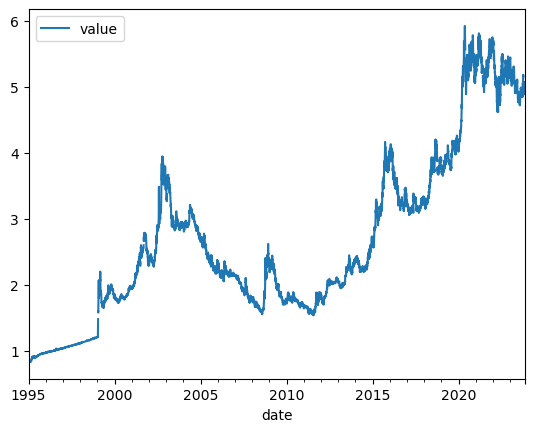

In [53]:
df_dollar.plot();

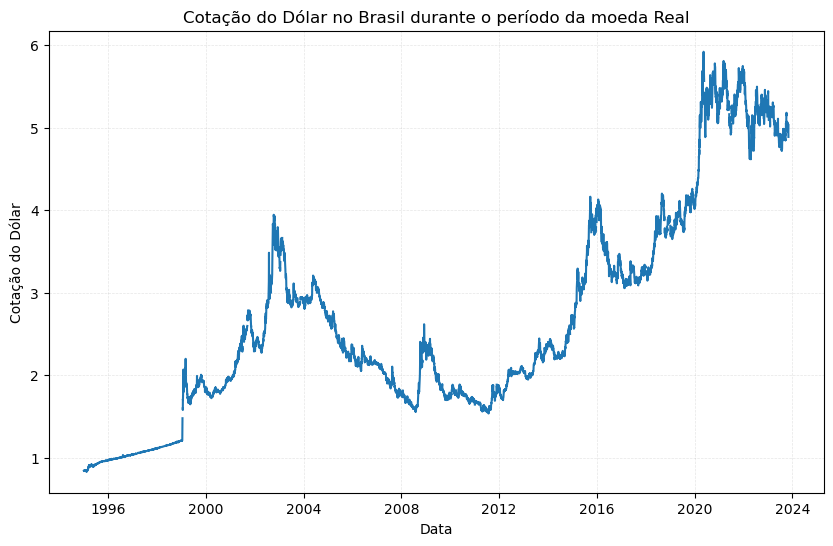

In [54]:
# criando uma figura com o matplotlib, definindo o tamanho
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

plt.show()

In [55]:
# pegando a última data do dataframe
ultima_data = df_dollar.index[-1]
ultima_data

Timestamp('2023-11-03 00:00:00')

In [56]:
# períodos dos presidentes
presidentes = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2023-08-04"),
}

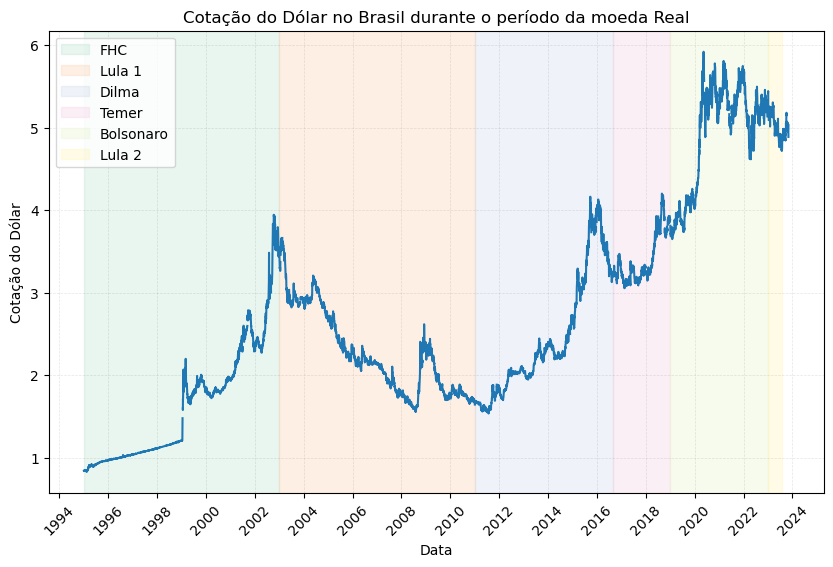

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

# pegando as cores da paleta Pastel2 do Matplotlib
cores = plt.cm.Pastel2.colors

# criando com vspan os retângulos para cada presidente
for presidente, periodo, cor in zip(presidentes.keys(), presidentes.values(), cores):
    ax.axvspan(
        periodo[0],
        periodo[1],
        color=cor,
        alpha=0.3,
        label=presidente,
    )
    
# colocando os anos de 2 em 2 no eixo x com o ticker do matplotlib
from matplotlib.dates import YearLocator

ax.xaxis.set_major_locator(YearLocator(2))

# rotacionando os ticks do eixo x
ax.xaxis.set_tick_params(rotation=45)
    
ax.legend()

plt.show()

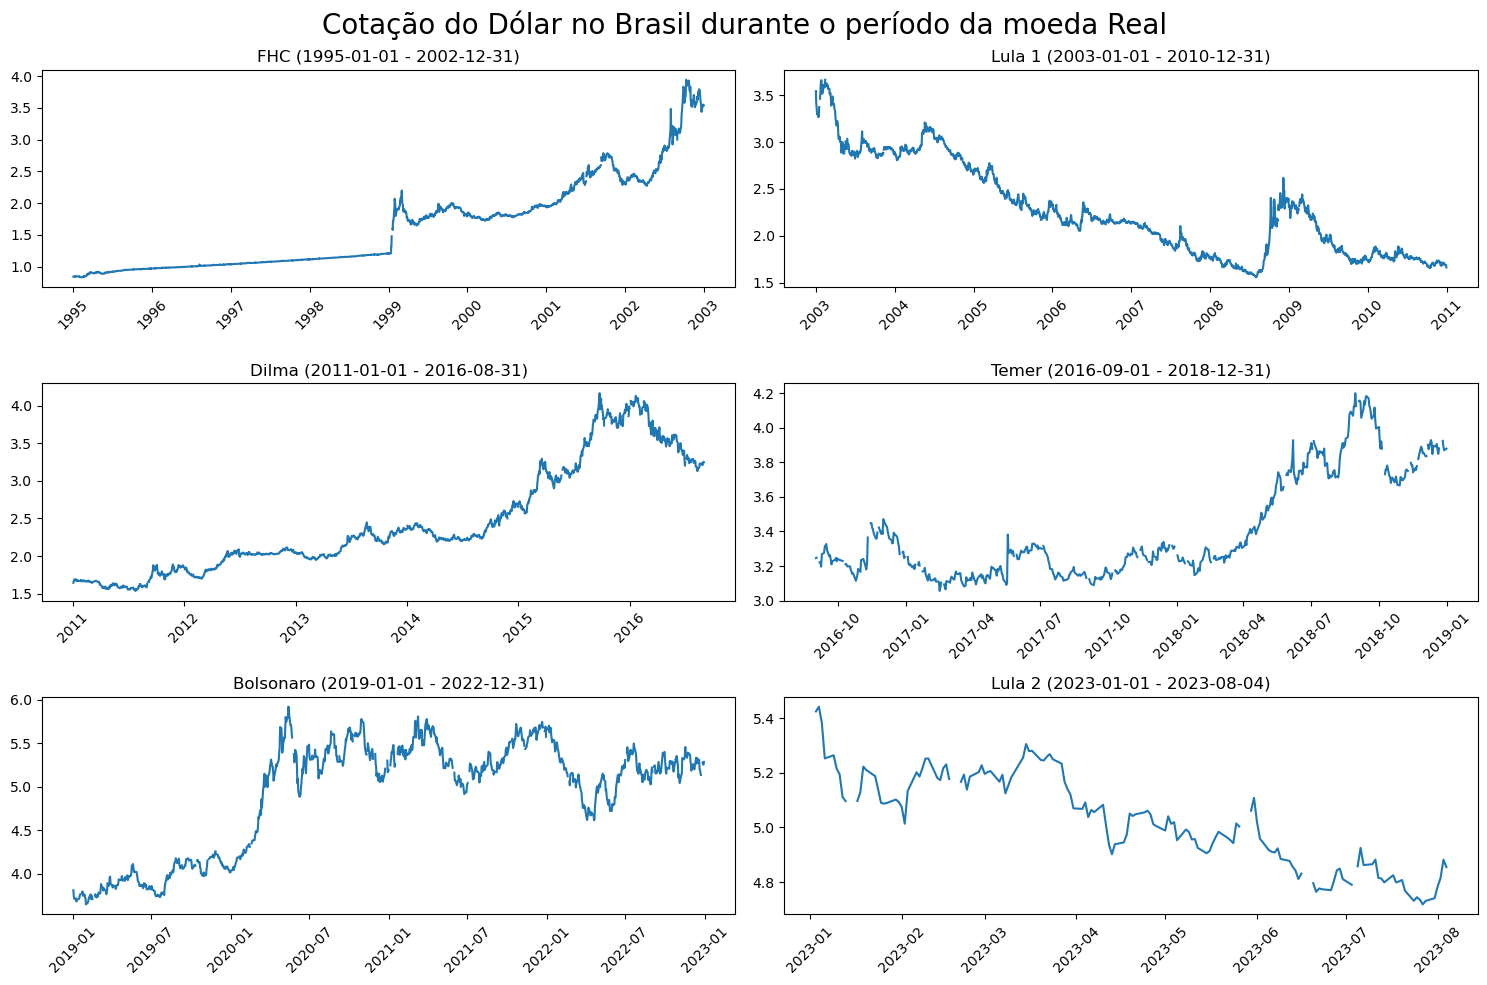

In [58]:
# criando um grid de subplots 3 x 2, ficando um subplot para cada presidente
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

# iterando sobre os presidentes e os subplots
for presidente, periodo, ax in zip(presidentes.keys(), presidentes.values(), axs.flat):
    df_temp = df_dollar.loc[presidentes[presidente][0] : presidentes[presidente][1]]
    ax.plot(df_temp.index, df_temp["value"])
    # rotacionando os ticks do eixo x
    ax.xaxis.set_tick_params(rotation=45)
    
    # colocando o título de cada subplot com o nome do presidente e o período
    ax.set_title(f"{presidente} ({periodo[0]} - {periodo[1]})")
    

fig.suptitle("Cotação do Dólar no Brasil durante o período da moeda Real", fontsize=20)

plt.show()